In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Einasto_profile as ein
import NFW_profile as nfw
from astropy.cosmology import FlatLambdaCDM

In [2]:
import utils

# Conversion from $200m$ to $200c$ overdensity definition

we define a background `astropy` cosmology :

In [3]:
cosmo_astropy = FlatLambdaCDM(H0=71.0, Om0=0.265, Ob0 = 0.0448)

In [4]:
cluster_z = 0.7

## 1. Einasto profile

We define halo parameters following the $200m$ overdensity definition:
1. the mass $M_{200m}$ 
2. the concentration $c_{200m}$
3. the slope parameter $\alpha_{200m}$

In [5]:
M200m = 7.e14
c200m = 0.5
alpha200m = 0.15

we can get the equivalent halo parameters using `M200m_to_M200c_einasto`

In [6]:
M200c, c200c, alpha200c = utils.M200m_to_M200c_einasto(M200m, c200m, alpha200m, cluster_z, cosmo_astropy)

In [7]:
print('---> input parameters:')
print(f'M_200m = {M200m:.2e} M_sun' )
print(f'c_200m = {c200m:.2f}' )
print(f'alpha_200m = {alpha200m:.3f}' )
print(' ')
print(' ')
print('---> output parameters:')
print(f'M_200c = {M200c:.2e} M_sun' )
print(f'c_200c = {c200c:.2f}' )
print(f'alpha_200c = {alpha200c:.3f}' )

---> input parameters:
M_200m = 7.00e+14 M_sun
c_200m = 0.50
alpha_200m = 0.150
 
 
---> output parameters:
M_200c = 4.75e+14 M_sun
c_200c = 0.38
alpha_200c = 0.150


For validation, we plot the two radial dark matter density $\rho_{200m}(r)$ and $\rho_{200c}(r)$ and the relative error bteween the two radial densities

In [8]:
cl_200m = ein.Modeling(M200m, c200m, alpha200m, cluster_z, 'mean', cosmo_astropy)
cl_200c = ein.Modeling(M200c, c200c, alpha200c, cluster_z, 'critical', cosmo_astropy)

In [9]:
print(f'r_200m = {cl_200m.r200} Mpc')
print(f'r_200c = {cl_200c.r200} Mpc')

r_200m = 1.6615621777598797 Mpc
r_200c = 1.2574214692943257 Mpc


In [10]:
r = np.logspace(-2,4,20)

In [11]:
rho_200m = cl_200m.density(r)
rho_200c = cl_200c.density(r)

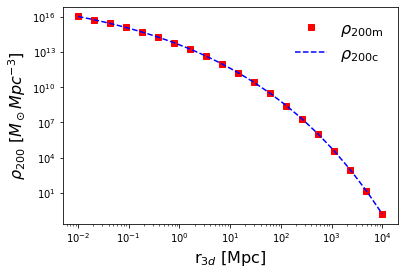

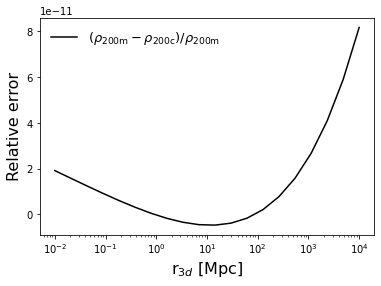

In [12]:
plt.figure(figsize = (6,4))
plt.loglog(r, rho_200m, 'sr', label = r'$\rho_{\rm 200m}$')
plt.loglog(r, rho_200c, '--b', label = r'$\rho_{\rm 200c}$')
plt.xlabel(r'r$_{3d}$ [Mpc]', fontsize = 16)
plt.ylabel(r'$\rho_{\rm 200} \ [M_\odot Mpc^{-3}]$', fontsize = 16)
plt.legend(fontsize = 16, frameon = False)
plt.show()
plt.figure(figsize = (6,4))
plt.plot(r, (rho_200m-rho_200c)/rho_200m, '-k', label = r'$(\rho_{\rm 200m} - \rho_{\rm 200c})/\rho_{\rm 200m}$')
plt.xscale('log')
plt.xlabel(r'r$_{3d}$ [Mpc]', fontsize = 16)
plt.ylabel('Relative error', fontsize = 16)
plt.legend(fontsize = 13, frameon = False, loc = 'best')
plt.show()

## 2. NFW profile

We define halo parameters following the $200m$ overdensity definition:
1. the mass $M_{200m}$ 
2. the concentration $c_{200m}$

In [13]:
M200m = 7.e14
c200m = 0.4

we can get the equivalent halo parameters in 200c definition using `M200m_to_M200c_nfw`

In [14]:
M200c, c200c = utils.M200m_to_M200c_nfw(M200m, c200m, cluster_z, cosmo_astropy)

In [15]:
print('---> input parameters:')
print(f'M_200m = {M200m:.2e} M_sun' )
print(f'c_200m = {c200m:.2f}' )
print(' ')
print(' ')
print('---> output parameters:')
print(f'M_200c = {M200c:.2e} M_sun' )
print(f'c_200c = {c200c:.2f}' )

---> input parameters:
M_200m = 7.00e+14 M_sun
c_200m = 0.40
 
 
---> output parameters:
M_200c = 4.04e+14 M_sun
c_200c = 0.29


In [16]:
cl_200m = nfw.Modeling(M200m, c200m, cluster_z, 'mean', cosmo_astropy)
cl_200c = nfw.Modeling(M200c, c200c, cluster_z, 'critical', cosmo_astropy)

In [17]:
print(f'r_200m = {cl_200m.r200} Mpc')
print(f'r_200c = {cl_200c.r200} Mpc')

r_200m = 1.6615621777598797 Mpc
r_200c = 1.191600481743136 Mpc


In [18]:
rho_200m = cl_200m.density(r)
rho_200c = cl_200c.density(r)

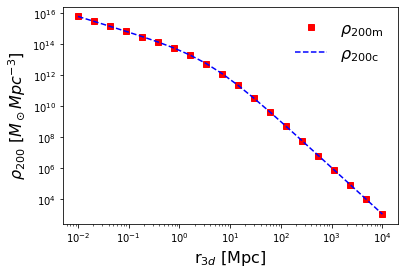

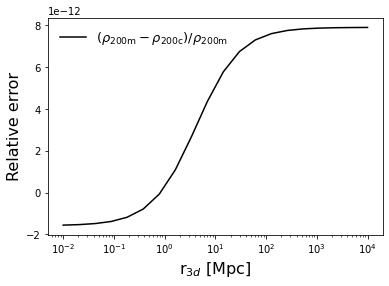

In [19]:
plt.figure(figsize = (6,4))
plt.loglog(r, rho_200m, 'sr', label = r'$\rho_{\rm 200m}$')
plt.loglog(r, rho_200c, '--b', label = r'$\rho_{\rm 200c}$')
plt.xlabel(r'r$_{3d}$ [Mpc]', fontsize = 16)
plt.ylabel(r'$\rho_{\rm 200} \ [M_\odot Mpc^{-3}]$', fontsize = 16)
plt.legend(fontsize = 16, frameon = False)
plt.show()
plt.figure(figsize = (6,4))
plt.plot(r, (rho_200m-rho_200c)/rho_200m, '-k', label = r'$(\rho_{\rm 200m} - \rho_{\rm 200c})/\rho_{\rm 200m}$')
plt.xscale('log')
plt.xlabel(r'r$_{3d}$ [Mpc]', fontsize = 16)
plt.ylabel('Relative error', fontsize = 16)
plt.legend(fontsize = 13, frameon = False, loc = 'best')
plt.show()